In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load CSV

In [105]:
gc_members = pd.read_csv('../data/NSS_GreatCare_Members.csv', low_memory=False)
ip_admin = pd.read_csv('../data/NSS_Hospital_Inpatient_Admissions.csv', low_memory=False)
pc_visits = pd.read_csv('../data/NSS_PrimaryCare_Office_Visits.csv', low_memory=False)

## Convert Date Time

In [106]:
ip_admin['Encounter Start Date'] = pd.to_datetime(ip_admin['Encounter Start Date'], format='%Y-%m-%d')
ip_admin['Encounter End Date'] = pd.to_datetime(ip_admin['Encounter End Date'], format='%Y-%m-%d')
pc_visits['Encounter Date'] = pd.to_datetime(pc_visits['Encounter Date'], format='%Y-%m-%d')

## Question 1:

In [107]:
ip_admin = ip_admin.sort_values(['Patient ID','Encounter Start Date', 'Encounter End Date'], ascending = (False, True, True))

In [7]:
# ip_admin['time_lapse'] = ip_admin['Encounter End Date'] - ip_admin['Encounter Start Date']

In [8]:
# ip_admin1['diff'] = ip_admin1.groupby('Patient ID')['Encounter Start Date'].diff() / np.timedelta64(1, 'D')
# ip_admin1['diff'] = ip_admin1['diff'].fillna(0)
# ip_admin1['diff_end'] = ip_admin1.groupby('Patient ID')['Encounter End Date'].diff() / np.timedelta64(1, 'D')
# ip_admin1['diff_end'] = ip_admin1['diff_end'].fillna(0)
# ip_admin1

## Create "Previous End Date" column 
Calculate number of days

In [94]:
ip_admin['Previous End Date'] = (ip_admin.groupby('Patient ID')['Encounter End Date'].shift(1))
ip_admin['Days Since Last Visit'] = ip_admin['Encounter Start Date'] - ip_admin['Previous End Date']
ip_admin = ip_admin[ip_admin['Days Since Last Visit'].notnull()]
ip_admin_30 = ip_admin[ip_admin['Days Since Last Visit'] <= '30 days']
ip_admin_under_30 = ip_admin[ip_admin1['Days Since Last Visit'] < '30 days']
ip_between = ip_admin[ip_admin['Days Since Last Visit'].between('0 days', '30 days', inclusive=True)]
ip_between.head()

/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Previous End Date,Days Since Last Visit
6197,HIA|DS1|9935|DS1|NPI|1366401333|1,DS1|9935,DS1|1,DS1|5047X,DS1|NPI|1366401333,DS1|NPI|1790917086,1.790917e+09,1366401333,2011-01-26,2011-02-07,0,0,2.0,D,6,21.0,NaN,NaN,I63.211,Cerebral infarction due to unspecified occlusi...,0,45890.00,250.00,2011-01-26,0 days
6148,HIA|DS1|9511|DS1|NPI|1902803315|3,DS1|9511,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1194868182,1.194868e+09,1902803315,2014-02-06,2014-02-07,0,0,3.0,1,1,21.0,759.5,Tuberous sclerosis,NaN,NaN,0,5200.00,250.00,2014-01-22,15 days
6130,HIA|DS1|9391|DS1|NPI|1114901352|1,DS1|9391,DS1|1,DS1|5047W,DS1|NPI|1114901352,DS1|NPI|1326006941,1.326007e+09,1114901352,2015-02-17,2015-03-01,0,0,3.0,4,1,21.0,NaN,NaN,R26.9,Unspecified abnormalities of gait and mobility,0,43935.04,250.00,2015-02-17,0 days
6119,HIA|DS1|9217|DS1|NPI|1689772592|3,DS1|9217,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1194781351,1.194781e+09,1689772592,2011-06-04,2011-06-14,0,0,2.0,2,20,21.0,162.9,"Malignant neoplasm of bronchus and lung, unspe...",NaN,NaN,0,42765.96,174.04,2011-05-31,4 days
6083,HIA|DS1|881|DS1|NPI|1427055839|3,DS1|881,DS1|1,DS1|5047X,DS1|NPI|1427055839,DS1|NPI|1386678746,1.386679e+09,1427055839,2011-08-28,2011-08-30,1,0,1.0,1,1,21.0,NaN,NaN,K57.31,Diverticulosis of large intestine without perf...,0,11351.10,250.00,2011-08-25,3 days


In [113]:
ip_between1 = ip_between
ip_between1 = ip_between[['Patient ID', 'Encounter Start Date', 'Encounter End Date', 'Previous End Date', 'Days Since Last Visit']]
# ip_between1.head()

##### Count of Unique Patient IDs

In [38]:
#numerator
ip_between['Patient ID'].nunique()

445

In [39]:
#denomenator
ip_admin['Patient ID'].nunique()

4701

In [12]:
#count of unique patient ids
(ip_between['Patient ID'].nunique() / ip_admin['Patient ID'].nunique()) * 100

9.46607104871304

##### Readmissions between 0 and 30 days. Use this

In [35]:
#numerator
ip_between['Patient ID'].count()

703

In [36]:
#denomenator
ip_admin['Patient ID'].count()

6213

In [73]:
#count of days between 0 and 30
round((ip_between['Patient ID'].count() / ip_admin['Patient ID'].count()) * 100,3)

11.315

11.315%

Brenda's Code

In [18]:
# #make df(patient, start date, end date)
# one = adm[['Patient ID','Encounter Start Date','Encounter End Date']]
# #set datetime
# one['Encounter Start Date'] = pd.to_datetime(one['Encounter Start Date'], format='%Y-%m-%d')
# one['Encounter End Date'] = pd.to_datetime(one['Encounter End Date'], format='%Y-%m-%d')
# #order by patient then start date
# one = one.sort_values(['Patient ID',"Encounter Start Date", "Encounter End Date"], ascending = (False, True, True))
# #if difference between Encounter End Date and Encounter Start Date < 30
# one['diff'] = one.groupby('Patient ID')['Encounter Start Date'].diff() / np.timedelta64(1, 'D')
# one['diff'] = one['diff'].fillna(0)
# one['diff_end'] = one.groupby('Patient ID')['Encounter End Date'].diff() / np.timedelta64(1, 'D')
# one['diff_end'] = one['diff_end'].fillna(0)
# one

### Bucket By Month<br>
For graphing purposes

In [98]:
# new variables
ip_admin2 = ip_admin
ip_admin2['year'] = pd.DatetimeIndex(ip_admin2['Previous End Date']).year
ip_admin2['month'] = pd.DatetimeIndex(ip_admin2['Previous End Date']).month
ip_admin2

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Previous End Date,Days Since Last Visit,year,month
6203,HIA|DS1|9943|DS1|NPI|1184722779|3,DS1|9943,DS1|1,DS1|5047X,DS1|NPI|1184722779,DS1|NPI|1265649966,1.265650e+09,1184722779,2014-10-28,2014-10-30,0,0,3.0,1,1,21.0,NaN,NaN,K43.0,"Incisional hernia with obstruction, without ga...",0,20869.25,500.00,2013-10-28,365 days,2013,10
6197,HIA|DS1|9935|DS1|NPI|1366401333|1,DS1|9935,DS1|1,DS1|5047X,DS1|NPI|1366401333,DS1|NPI|1790917086,1.790917e+09,1366401333,2011-01-26,2011-02-07,0,0,2.0,D,6,21.0,NaN,NaN,I63.211,Cerebral infarction due to unspecified occlusi...,0,45890.00,250.00,2011-01-26,0 days,2011,1
6148,HIA|DS1|9511|DS1|NPI|1902803315|3,DS1|9511,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1194868182,1.194868e+09,1902803315,2014-02-06,2014-02-07,0,0,3.0,1,1,21.0,759.5,Tuberous sclerosis,NaN,NaN,0,5200.00,250.00,2014-01-22,15 days,2014,1
6130,HIA|DS1|9391|DS1|NPI|1114901352|1,DS1|9391,DS1|1,DS1|5047W,DS1|NPI|1114901352,DS1|NPI|1326006941,1.326007e+09,1114901352,2015-02-17,2015-03-01,0,0,3.0,4,1,21.0,NaN,NaN,R26.9,Unspecified abnormalities of gait and mobility,0,43935.04,250.00,2015-02-17,0 days,2015,2
6119,HIA|DS1|9217|DS1|NPI|1689772592|3,DS1|9217,DS1|1,DS1|5047X,DS1|NPI|1689772592,DS1|NPI|1194781351,1.194781e+09,1689772592,2011-06-04,2011-06-14,0,0,2.0,2,20,21.0,162.9,"Malignant neoplasm of bronchus and lung, unspe...",NaN,NaN,0,42765.96,174.04,2011-05-31,4 days,2011,5
6116,HIA|DS1|9204|DS1|NPI|1992818256|2,DS1|9204,DS1|1,DS1|5047W,DS1|NPI|1992818256,DS1|NPI|1467789792,1.467790e+09,1992818256,2013-06-09,2013-06-18,0,0,2.0,2,1,NaN,NaN,NaN,O60.14X0,Preterm labor third trimester with preterm del...,0,0.00,0.00,2013-06-18,-9 days,2013,6
6083,HIA|DS1|881|DS1|NPI|1427055839|3,DS1|881,DS1|1,DS1|5047X,DS1|NPI|1427055839,DS1|NPI|1386678746,1.386679e+09,1427055839,2011-08-28,2011-08-30,1,0,1.0,1,1,21.0,NaN,NaN,K57.31,Diverticulosis of large intestine without perf...,0,11351.10,250.00,2011-08-25,3 days,2011,8
5982,HIA|DS1|7733|DS1|NPI|1104906569|1,DS1|7733,DS1|1,DS1|5047W,DS1|NPI|1104906569,DS1|NPI|1366644957,1.366645e+09,1104906569,2013-09-27,2013-10-03,0,0,1.0,1,1,23.0,NaN,NaN,I11.0,Hypertensive heart disease with heart failure,0,20170.02,250.00,2013-04-01,179 days,2013,4
5956,HIA|DS1|7465|DS1|NPI|1184722779|3,DS1|7465,DS1|1,DS1|5047W,DS1|NPI|1184722779,DS1|NPI|1063616639,1.063617e+09,1184722779,2015-10-10,2015-10-12,0,0,2.0,1,1,21.0,NaN,NaN,O60.14X0,Preterm labor third trimester with preterm del...,0,7656.00,250.00,2015-09-10,30 days,2015,9
5912,HIA|DS1|7062|DS1|NPI|1184722779|3,DS1|7062,DS1|1,DS1|5047X,DS1|NPI|1184722779,DS1|NPI|1073758652,1.073759e+09,1184722779,2013-06-28,2013-07-01,1,0,1.0,1,3,21.0,592.1,Calculus of ureter,NaN,NaN,0,18837.00,0.00,2013-02-28,120 days,2013,2


In [99]:
#filter for number of readmissions per patient
read_count_patient = ip_admin2.groupby(['Patient ID'], as_index=False).count()
read_count_patient = read_count_patient.sort_values(['Patient ID'], ascending = (False))
read_count_patient_high = read_count_patient[read_count_patient['Encounter ID'] >= 0]

In [100]:
#filter for number of readmissions per Hospital
read_count_hospital = ip_admin2.groupby(['Facility Provider NPI'], as_index=False).count()
read_count_hospital = read_count_hospital.sort_values(['Patient ID'], ascending = (False))
read_count_hospital_high = read_count_hospital[read_count_hospital['Encounter ID'] >= 5]

In [102]:
#filter for number of readmissions per Attendant 
read_count_attendant = ip_admin2.groupby(['Attending Provider NPI'], as_index=False).count()
read_count_attendant = read_count_attendant.sort_values(['Patient ID'], ascending = (False))
read_count_attendant_high = read_count_attendant[read_count_attendant['Encounter ID'] >= 5]

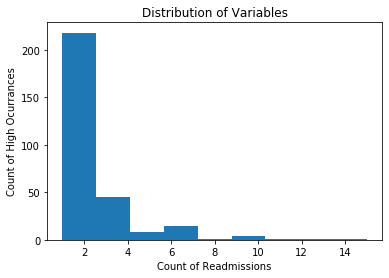

In [115]:
#filter for number of readmissions per patient
occurance1 = read_count_patient_high
bin1 = 9
#filter for number of readmissions per Hospital
occurance2 = read_count_hospital_high
bin2 = 7
#filter for number of readmissions per Attendant 
occurance3 = read_count_attendant_high
bin3 = 7

_= plt.hist('Encounter ID', bins = bin1, data = occurance1)
_= plt.title('Distribution of Variables')
_= plt.ylabel('Count of High Ocurrances')
_= plt.xlabel('Count of Readmissions')

In [111]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Facility Provider NPI', y='Encounter ID',  data=occurance2)

AttributeError: module 'seaborn' has no attribute 'set_theme'

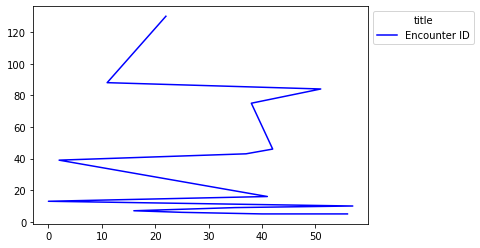

In [112]:
#filter for number of readmissions per patient
occurance1 = read_count_patient_high
#filter for number of readmissions per Hospital
occurance2 = read_count_hospital_high
#filter for number of readmissions per Attendant 
occurance3 = read_count_attendant_high

ax = plt.gca()
#_=occurance1['Encounter ID'].plot(kind='line', color = 'red', x ='Variable',y ='Count', ax = ax)
_=occurance2['Encounter ID'].plot(kind='line', color = 'blue', x ='Variable',y ='Count', ax = ax)
_=plt.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')

# Question 2

In [52]:
### make df and merge
ad_short = ip_admin[['Patient ID','Encounter End Date']]
pcp_short = pc_visits[['Patient ID','Encounter Date']]
two = pd.merge(ad_short, pcp_short, how='left', on='Patient ID')
# two = ad_cut.merge(pcp_cut, left_on ='Patient ID', right_on = 'Patient ID',how='left', indicator = False)
###sort
two = two.sort_values(['Patient ID',"Encounter Date", "Encounter End Date"], ascending = (False, True, True))
###sub encounter date from end dates
two['Days Since Last Visit'] = two['Encounter Date'] - two['Encounter End Date']
two_between = two[two['Days Since Last Visit'].between('0 days', '7 days', inclusive=True)]
# two_top = two[two['Days Since Last Visit'] <= '7 days']
# two_top = two_top[two_top['Days Since Last Visit'] >= '0 days']
# two_top
len(two_between)

2375

#### Drop Duplicates From PCP

In [53]:
two_between_dups = two_between.sort_values(['Patient ID'], ascending = (False)).drop_duplicates(
                    ['Patient ID','Encounter End Date'])

In [54]:
len(two_between_dups)

1863

#### By Admission

In [64]:
#numerator
two_between_dups['Patient ID'].count()

1863

In [65]:
#denomenator
two['Patient ID'].count()

44098

In [75]:
round((two_between_dups['Patient ID'].count() / ip_admin['Patient ID'].count()) * 100,3)

29.986

29.986%

#### Bucket By Month 

For graphing purposes